Assignment 3 - Tassyirifiyya

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Melakukan import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#import library yang dibutuhkan dalam melakukan model svm
from sklearn.svm import SVC

#melakukan decision tree
from sklearn.tree import DecisionTreeClassifier

#melakukan random forest
from sklearn.ensemble import RandomForestClassifier

#library naive bayes
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("dataset/bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**Dataset bank full csv mengandung info tentang pemasaran langsung bank dari Portugal. Hal ini untuk bertujuan memprediksi apakah seseorang akan berlangganan (yes) atau tidak berlangganan (no) pada deposito bank**

**Dataset ini memiliki 17 kolom yaitu:**
1. age = usia pelanggan
2. job = jenis perkerjaan pelanggan
3. marital = status pernikahan pelanggan
4. education = tingkat pendidikan pelanggan
5. default = mengetahui status kredit pelanggan, macet atau tidak
6. balance = saldo rata-rata pelanggan (EURO)
7. hosuing = mengetahui pelanggana memiliki pinjaman rumah atau tidak
8. loan = apakah pelanggan memiliki pinjaman pribadi atau tidak
9. contact = cara komunikasi dengan pelanggan (via apa)
10. day = hari dalam bulan terakhir pelanggan dihubungi
11. month = bulan terakhir pelanggan dihubungi
12. duration = durasi panggilan (detik)
13. campaign = jumlah kontak yang dialkukan selama promosi berlangganan pada pelanggan
14. pdays = jumlah hari sejak pelanggan terakhir dihubungi
15. previous = Jumlah kontak yang dilakukan sebelum 
16. poutcome = Hasil dari promosi pemasaran sebelumnya
17. y = target pelanggan, yes or no

## Melihat 5 Data Teratas

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Melihat 5 Data Terbawah

In [4]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Melihat Informasi Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Diketahui bahwa dataset bank full ini memiliki 45.211 baris dengan 17 kolom, 16 di antaranya adalah kolom feature dan 1 kolom target**

## Melihat Nilai NULL pada Dataset

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Tidak terdapat nilai null pada dataset ini, sehingga data ini siap untuk diolah**

## Melihat Dimensi Baris dan Kolom

In [7]:
df.shape

(45211, 17)

## Melihat Informasi Statistik Dataset

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Mengubah kolom y sebagai target, menjadi kolom Class. Hal ini untuk mempermudah pemahaman dalam mengolah dataset**

In [10]:
df.rename(columns={'y' : 'Class'}, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**Melihat jumlah value Class, disini terlihat bahwa terdapat imbalance class. Hal ini dapat dilihat bahwa value yes lebih sedikit dibandingkan no**

In [11]:
print("Subscribed", len(df[df['Class']=='yes']))
print("Not Subscribed", len(df[df['Class']=='no']))

Subscribed 5289
Not Subscribed 39922


In [12]:
class_plot = pd.Series({'Accept Subscribed':len(df[df['Class']=='yes']),
                       'Reject Subscribed': len(df[df['Class']=='no'])})
class_plot

Accept Subscribed     5289
Reject Subscribed    39922
dtype: int64

<AxesSubplot:>

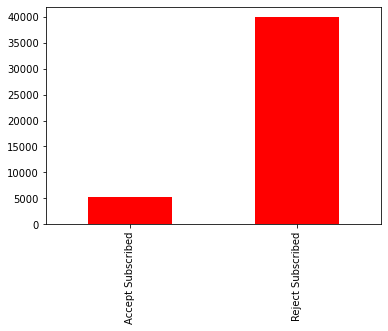

In [13]:
class_plot.plot(kind='bar', color='red')

**Dapat dilihat dari visualisasi di atas bahwa Reject Subscribed Bank atau 'no' memiliki nilai yang lebih banyak hampir mencapai 40.000**

## Menghitung Count dari Kolom

In [14]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Code di atas digunakan untuk melihat jumlah values dari masing-masing kategori pada kolom**

## Melihat Correlation Antarkolom

C:\Users\USER DK\AppData\Local\Temp\ipykernel_15928\1236747308.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


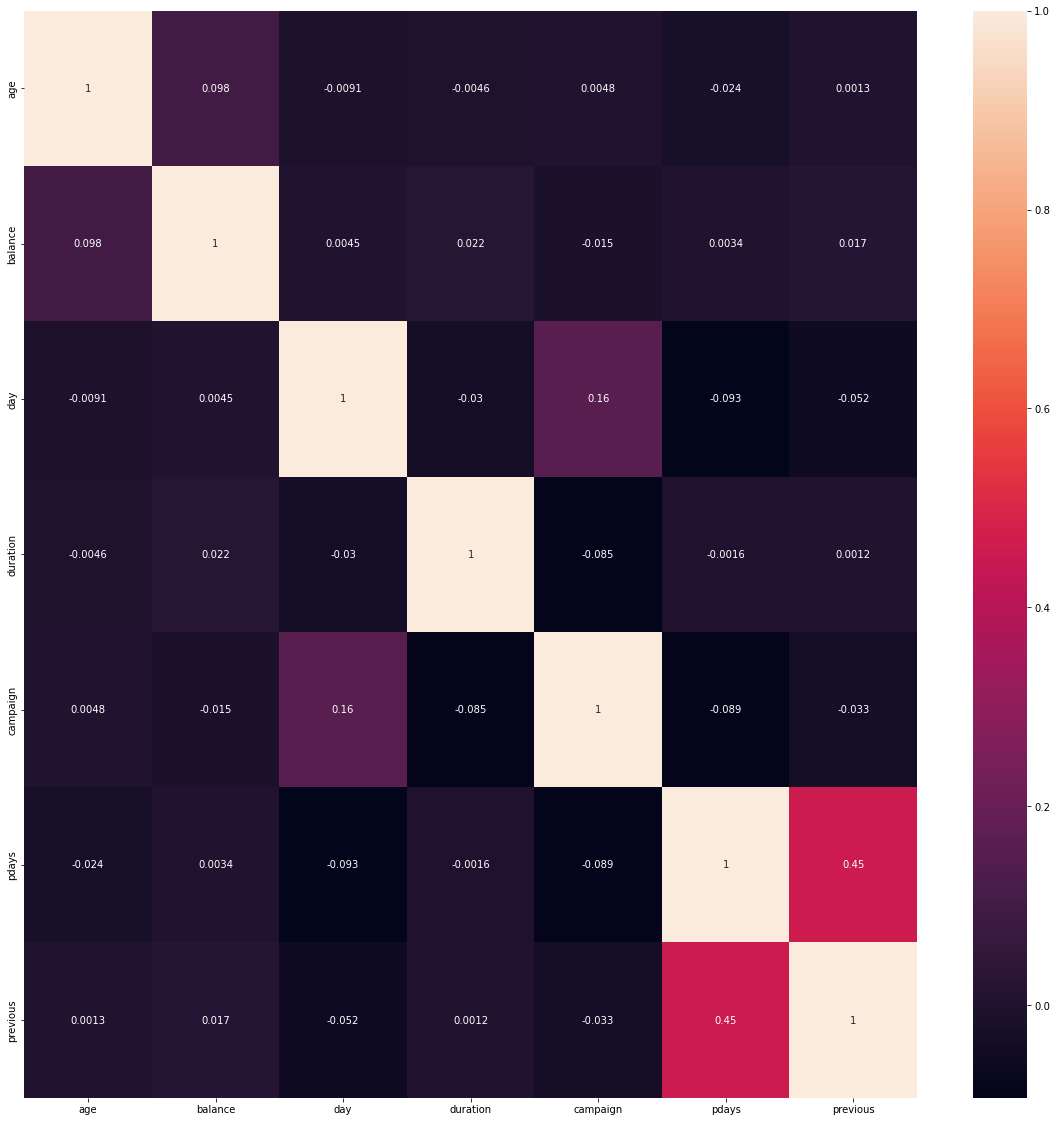

In [15]:
#heat_bank = df.drop('Class',axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Pada correlation map di atas dapat dilihat bahwa kolom yang berkorelasi lebih tinggi dengan kolom 'dirinya' sendiri**

**Selain itu, kolom yang berkorelasi tinggi juga terdapat pada kolom pdays dan previous**

**Pada visualisasi data di atas terdapat warning karena nilai pada kolom masih banyak yang belum bertipe numerik**

In [16]:
df_enc = df
df_enc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Dibuat variabel baru yang berisi dataframe data bank-full yang akan menampung data yang telah dilakukan LabelEncoder()**

**label encoding mengacu pada proses transformasi label kata menjadi bentuk numerik**

In [17]:
le = LabelEncoder()
df_enc['job'] = le.fit_transform(df_enc['job'])
df_enc['marital'] = le.fit_transform(df_enc['marital'])
df_enc['education'] = le.fit_transform(df_enc['education'])
df_enc['default'] = le.fit_transform(df_enc['default'])
df_enc['housing'] = le.fit_transform(df_enc['housing'])
df_enc['loan'] = le.fit_transform(df_enc['loan'])
df_enc['contact'] = le.fit_transform(df_enc['contact'])
df_enc['poutcome'] = le.fit_transform(df_enc['poutcome'])
df_enc['Class'] = le.fit_transform(df_enc['Class'])

df_enc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


**Proses transformasi berhasil dilakukan, selanjutnya, mengubah kolom month yang berisi dari bulan januari - desember dengan angka bulan seharusnya**

In [18]:
df_enc.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [19]:
month_map = {
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12,
}

df_enc['month'] = df_enc['month'].replace(month_map) 
df_enc

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


**Dibuat dictionary dengan key nama bulan dan value angka numerik dari bulan tersebut. Selanjutnya menggunakan fungsi replace untuk mengganti nilai dari kolom tersebut**

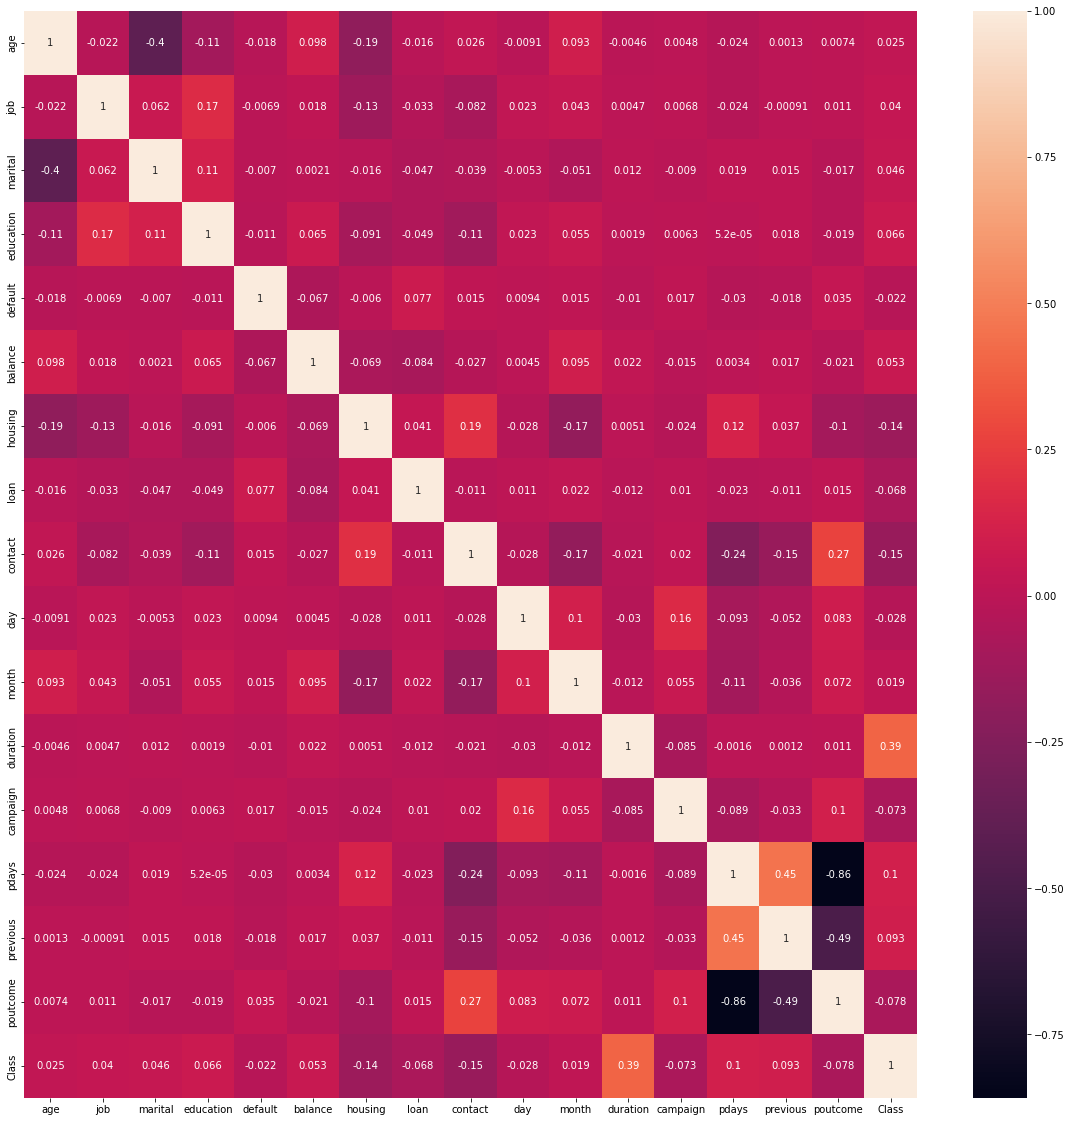

In [20]:
#heat_bank = df_enc.drop('Class',axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()

**Selanjutnya, dilakukan correlation map kembali, dapat dilihat bahwa masing-masing kolom sekarang sudah lebih baik tampilannya karena telah dilakukan LabelEncode**

dapat dilihat gambar dengan anotasi 1 tersebut berkorelasi tinggi dengan dirinya sendiri

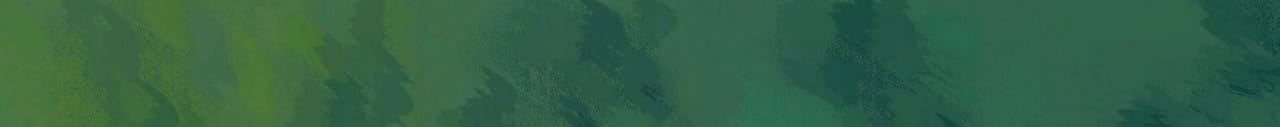

# Logistic Regression

In [21]:
#Melakukan extract fitur
X = df_enc[['balance','duration']]
y = df_enc['Class']

dilakukan pemilihan nilai X dan y. nilai X yang dipilih adalah balace = saldo rata-rata
dan duration = durasi telepon promosi. nilai y yang dipilih adalah Class sebagai target variabel

In [22]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

dilakukan splitting data dengan method train_test_split dengan parameter X dan y yang telah didefisnisikan dan test_size 30% sebagai data testing dan random_state = 2024

In [23]:
#melihat nilai X train
X_train.head()

,balance,duration
25053,193,191
15274,39,138
11721,1465,40
43113,324,432
9796,7372,76


In [24]:
#Membangun model Logistic Regression
LogisticR_model = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

Dilakukan pembuatan model logistic regression dengan fungsi LogisticRegression yang berisi parameter
+ C untuk mengontrol kekuatan regulasi. C = 0.05 merupakan nilai yang cukup kuat untuk menghindari overfitting
+ random_state
+ solver untuk menentukan algoritma yang digunakan
+ multi class digunakan karena dataset ini bersifat multiclass, ovr atau one vest rest untuk mempelahari satu model untuk tiap kelas

In [25]:
#fitting model
LogisticR_model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

fit model digunakan untuk mempelajari pola dalam data training 

In [26]:
#Evaluasi performa model
print('Training Data Score: ',LogisticR_model.score(X_train, y_train))
print('Testing Data Score: ',LogisticR_model.score(X_test, y_test))

Training Data Score:  0.8890258160331153
Testing Data Score:  0.887791212031849


Dilakukan evaluasi performa model, baik training maupun testing untuk melihat akurasi dari model yang telah dibuat. Masing-masing score tidak berbeda jauh, hanya berbeda 0.002 saja

In [27]:
y_pred = LogisticR_model.predict(X_test)

predict() digunakan untuk membuat data baru dengan parameter X_test lalu dicombine dengan model Logistic yang dtelah dibuat

In [28]:
confusion_matrix (y_test, y_pred)

array([[11795,   162],
       [ 1360,   247]], dtype=int64)

Dapat dilihat dari confusion matrix di atas bahwa model yang telah dibangun ini memiliki nilai TP 247, TN 11795, FP, 162, dan nilai FN 1360. Dapat dilihat masih banyak terjadi kesalahan dalam prediksi data.

Cara untuk melihat array confusion matrix dapat dilihat pada gambar di bawah

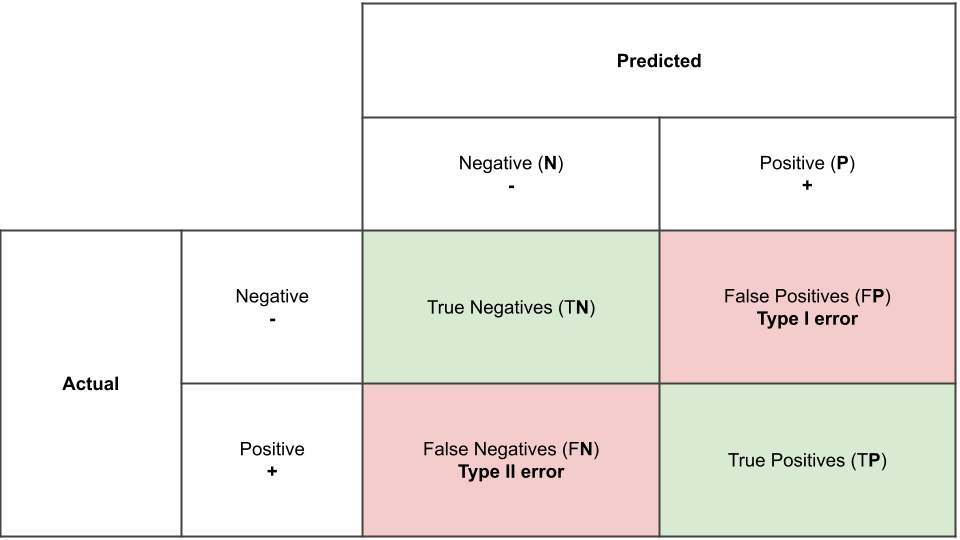

**Selanjutnya, dilakukan pembuatan model baru dengan menambahkan feature pada nilai X**

In [29]:
#Melakukan extract fitur
X = df_enc[['age','job','education','balance','duration']]
y = df_enc['Class']

pada variabel X diberikan feature age=umur, job=pekerjaan, education=tingkat pendidikan, balance=rata-rata saldo, dan duration=durasi telepon promosi. serta nilai y yang menjadi target menyimpan kolom Class

In [30]:
X.head()

,age,job,education,balance,duration
0,58,4,2,2143,261
1,44,9,1,29,151
2,33,2,1,2,76
3,47,1,3,1506,92
4,33,11,3,1,198


In [31]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

dilakukan splitting data dengan method train_test_split dengan parameter X dan y yang telah didefisnisikan dan test_size 30% sebagai data testing dan random_state = 2024

In [32]:
#melihat 3 data teratas x train
X_train.head(3)

,age,job,education,balance,duration
25053,38,4,2,193,191
15274,34,1,1,39,138
11721,35,3,0,1465,40


In [33]:
#Membangun model Logistic Regression
LogisticR_model = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

Dilakukan pembuatan model logistic regression dengan fungsi LogisticRegression yang berisi parameter
+ C untuk mengontrol kekuatan regulasi. C = 0.05 merupakan nilai yang cukup kuat untuk menghindari overfitting
+ random_state
+ solver untuk menentukan algoritma yang digunakan
+ multi class digunakan karena dataset ini bersifat multiclass, ovr atau one vest rest untuk mempelahari satu model untuk tiap kelas

In [34]:
#fitting model dengan data training
LogisticR_model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [35]:
#evaluasi performa score
print('Training Data Score: ',LogisticR_model.score(X_train, y_train))
print('Testing Data Score: ',LogisticR_model.score(X_test, y_test))

Training Data Score:  0.8886782317439251
Testing Data Score:  0.8894131524624005


Dilakukan evaluasi performa model, baik training maupun testing untuk melihat akurasi dari model yang telah dibuat. Masing-masing score tidak berbeda jauh, hanya berbeda 0.001 saja. Namun, pada model ini testing score lebih tinggi dibandingkan training score

In [36]:
y_pred_lr = LogisticR_model.predict(X_test)

confusion_matrix (y_test, y_pred_lr)

array([[11790,   167],
       [ 1333,   274]], dtype=int64)

predict() digunakan untuk membuat data baru dengan parameter X_test lalu dicombine dengan model Logistic yang dtelah dibuat

Dapat dilihat dari confusion matrix di atas bahwa model yang telah dibangun ini memiliki nilai TP 274, TN 11790, FP 167, dan nilai FN 1333. Dapat dilihat masih banyak terjadi kesalahan dalam prediksi data, namun nilai TP lebih meningkat dibandingkan sebelumnya

**Membuat model baru ke 3**

In [37]:
#Melakukan extract fitur
X = df_enc[['age','job','marital','education','balance','duration','loan','housing','pdays']]
y = df_enc['Class']

menambahkan fitur pada X, hal ini untuk melihat apakah dalam penambahan fitur terjadi penambahan skor dan perbaikan confusion matrix

In [38]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

dilakukan splitting data dengan method train_test_split dengan parameter X dan y yang telah didefisnisikan dan test_size 30% sebagai data testing dan random_state = 2024

In [39]:
#melihat data x train
X_train.head(3)

,age,job,marital,education,balance,duration,loan,housing,pdays
25053,38,4,1,2,193,191,0,0,-1
15274,34,1,2,1,39,138,0,0,-1
11721,35,3,0,0,1465,40,0,0,-1


In [40]:
#Membangun model Logistic Regression
LogisticR_model = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

Dilakukan pembuatan model logistic regression dengan fungsi LogisticRegression yang berisi parameter

+ C untuk mengontrol kekuatan regulasi. C = 0.05 merupakan nilai yang cukup kuat untuk menghindari overfitting
+ random_state
+ solver untuk menentukan algoritma yang digunakan
+ multi class digunakan karena dataset ini bersifat multiclass, ovr atau one vest rest untuk mempelahari satu model untuk tiap kelas

In [41]:
#fitting model dengan data train
LogisticR_model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [42]:
#EValuasi performa model
print('Training Data Score: ',LogisticR_model.score(X_train, y_train))
print('Testing Data Score: ',LogisticR_model.score(X_test, y_test))

Training Data Score:  0.8901001674724303
Testing Data Score:  0.8894131524624005


Pada score kali ini terjadi peningkatan akurasi score. Jika dibandingkan kedua score, perbedaan akurasi nya hanya 0.01

In [43]:
y_pred = LogisticR_model.predict(X_test)

confusion_matrix (y_test, y_pred)

array([[11748,   209],
       [ 1291,   316]], dtype=int64)

predict() digunakan untuk membuat data baru dengan parameter X_test lalu dicombine dengan model Logistic yang dtelah dibuat

Dapat dilihat dari confusion matrix di atas bahwa model yang telah dibangun ini memiliki nilai TP 316, TN 11748, FP 209, dan nilai FN 1291.

nilai TP menjadi meningkat, namun terjadi penurunan pada nilai TN sehingga banyak data prediksi yang terklasifikasi 'benar' padahal nyatanya tidak

**Membuat model ke 4**

In [44]:
X = df_enc.drop(columns=['Class'], axis=1)
y = y = df_enc['Class']

X yang dipakai memakai seluruh kolom kecuali kolom Class, karena Class digunakan sebagai target variabel

In [45]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

In [46]:
#Membangun model Logistic Regression
LogisticR_model = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

In [47]:
#fitting model dengan data train
LogisticR_model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [48]:
#Evaluasi performa model
print('Training Data Score: ',LogisticR_model.score(X_train, y_train))
print('Testing Data Score: ',LogisticR_model.score(X_test, y_test))

Training Data Score:  0.8901633646159194
Testing Data Score:  0.8901503981126512


In [49]:
y_pred = LogisticR_model.predict(X_test)

confusion_matrix (y_test, y_pred)

array([[11744,   213],
       [ 1277,   330]], dtype=int64)

Jika dilihat dari hasil score performa model, tidak terdapat perubahan yang cukup menonjol. Confusion matrix mengalami perubahan baik pada TP, namun tidak pada TN.

Penambahan feature juga tidak terlalu meningkatkan akurasi model dalam memprediksi data secara lebih baik lagi. Namun, hasil score dari training dan testing hampir sama baiknya

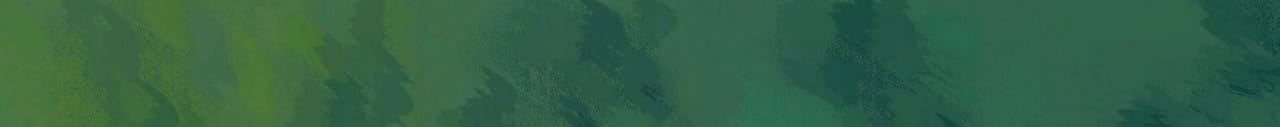

# K- Nearest Neighbors

In [50]:
#Melakukan extract fitur
X = df_enc[['age','job','education','balance','duration']]
y = df_enc['Class']

pada variabel X diberikan feature age=umur, job=pekerjaan, education=tingkat pendidikan, balance=rata-rata saldo, dan duration=durasi telepon promosi. serta nilai y yang menjadi target menyimpan kolom Class

In [51]:
#menampilkan variabel X
X

,age,job,education,balance,duration
0,58,4,2,2143,261
1,44,9,1,29,151
2,33,2,1,2,76
3,47,1,3,1506,92
4,33,11,3,1,198
...,...,...,...,...,...
45206,51,9,2,825,977
45207,71,5,0,1729,456
45208,72,5,1,5715,1127
45209,57,1,1,668,508


In [52]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

dilakukan splitting data dengan method train_test_split dengan parameter X dan y yang telah didefisnisikan dan test_size 30% sebagai data testing dan random_state = 2024

#### Memilih k terbaik untuk n_neighbors KNN
dengan menggunakan cross validation dapat melihat akurasi dari K, sehingga dapat dipilih K mana yang lebih baik bagi data X dan y

In [53]:
# inisialisasi model dengan k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)

# hitung akurasi dengan validasi silang 5-fold
scores_3 = cross_val_score(knn_3, X, y, cv=5, scoring='accuracy')

# hitung rata-rata akurasi dan standar deviasi dari 5-fold cross validation
print(f"K=3, rata-rata akurasi: {scores_3.mean():.3f}, std: {scores_3.std():.3f}")

K=3, rata-rata akurasi: 0.865, std: 0.010


In [54]:
# inisialisasi model dengan k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# hitung akurasi dengan validasi silang 5-fold
scores_5 = cross_val_score(knn_5, X, y, cv=5, scoring='accuracy')

# hitung rata-rata akurasi dan standar deviasi dari 5-fold cross validation
print(f"K=5, rata-rata akurasi: {scores_5.mean():.3f}, std: {scores_5.std():.3f}")

K=5, rata-rata akurasi: 0.875, std: 0.012


Digunakan validasi silang 5-fold dengan skor akurasi sebagai metrik evaluasi. cv=5  artinya dataset akan dibagi menjadi 5 bagian (fold) dan model akan dilatih dan diuji 5 kali dengan n_neigbors yang telah ditentukan

hasil akurasi tidak begitu jauh berbeda, namun k=5 lebih baik akurasinya

In [55]:
#Membangun model
knn_model = KNeighborsClassifier(n_neighbors=5)

Dibangun model dengan KNeighborsClassifier dengan n_neighbors =5 seperti yang telah dilihat di atas

In [56]:
#fit model dengan feature yang telah dibuat
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
#Melakukan prediksi data target
y_pred_knn = knn_model.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11957
           1       0.43      0.20      0.27      1607

    accuracy                           0.87     13564
   macro avg       0.67      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



In [59]:
print('Confusion Matrix KNN Model\n',
     confusion_matrix(y_test, y_pred_knn))

print("Score matrics", accuracy_score(y_test,y_pred_knn))

Confusion Matrix KNN Model
 [[11540   417]
 [ 1291   316]]
Score matrics 0.8740784429371866


Pada classification report dapat dilihat akurasi yang didapatkan adalah 0.87. Model ini juga baik hasil prediksi pada TP, namun masih banyak kesalahan dalam FP, sehingga nilai TN tidak terprediksi dengan baik

**Menggunakan StandarScaler untuk menormalisasi data menjadi rata-rata = 0 dan standar deviasi 1**

In [63]:
#Menggunakan StandarScaler
pipeline = Pipeline([('scaler', StandardScaler()), ('RF',knn_model)])
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)

#Print Classifition Report setelah StandardScaler()
print(classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_test, predicted)
print('Confusion Matrix KNN Model\n',conf_mat)

print("Score matrics", accuracy_score(y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11957
           1       0.50      0.26      0.34      1607

    accuracy                           0.88     13564
   macro avg       0.70      0.61      0.64     13564
weighted avg       0.86      0.88      0.87     13564

Confusion Matrix KNN Model
 [[11537   420]
 [ 1185   422]]
Score matrics 0.8816720731347685


Pipeline digunakan untuk menggabungkan pemrosesan data menggunakan StandarScaler dan KNeighborsClassifier untuk menstandarisasi skala data dan meningkatkan performa model.

Dapat dilihat bahwa akurasi pada model KNN menggunakan pipeline, meningkat sedikit dibandingkan sebelumnya

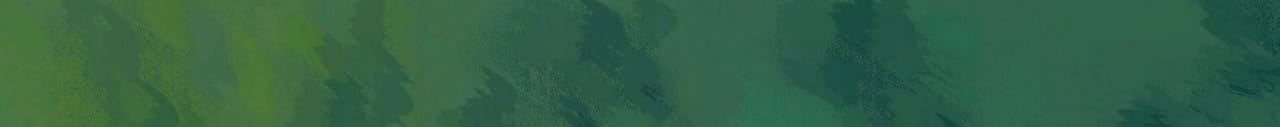

# SVM - SUPPORT VECTOR MACHINE

In [64]:
#melakukan read dataset
df_bank = pd.read_csv("dataset/bank.csv")
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Dilakukan read dataset bank karena ukurannya lebih kecil daripada data sebelumnya. Dikarenakan SVM biasanya lebih baik performa jika menggunakan dataset yang lebih kecil

Dataset bank.csv memiliki 4.521 baris dan 17 kolom

Kemudian, LabelEncoder beberapa kolom tertentu agar dapat diolah datanya

In [65]:
le = LabelEncoder()
df_bank['job'] = le.fit_transform(df_bank['job'])
df_bank['education'] = le.fit_transform(df_bank['education'])
df_bank['y'] = le.fit_transform(df_bank['y'])

df_bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,married,0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,7,married,1,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,4,single,2,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0


In [66]:
#Melakukan extract fitur
X = df_bank[['age','job','education','balance','duration']]
y = df_bank['y']

In [67]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [68]:
# bangun model
svc_model = SVC(kernel='linear')

# fitting model
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
#Evaluasi performa model
print('Training Data Score: ',svc_model.score(X_train, y_train))
print('Testing Data Score: ',svc_model.score(X_test, y_test))

Training Data Score:  0.8707332490518331
Testing Data Score:  0.8703021370670597


In [70]:
#Melakukan prediksi data target
y_pred_sv = svc_model.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1196
           1       0.40      0.18      0.25       161

    accuracy                           0.87      1357
   macro avg       0.65      0.57      0.59      1357
weighted avg       0.84      0.87      0.85      1357



In [72]:
print('Confusion Matrix KNN Model\n',
     confusion_matrix(y_test, y_pred_sv))

print("Score matrics", accuracy_score(y_test,y_pred_sv))

Confusion Matrix KNN Model
 [[1152   44]
 [ 132   29]]
Score matrics 0.8703021370670597


Pada model SVM dengan data testing 30% dapat dilihat bahwa data yang tepat diprediksi dengan benar atau TP adalah 1152, FP berjumlah 44, FN atau data yang sebenarnya positif tapi malah salah diprediksi berjumlah 132, dan data yang terbukti benar salah adalahh 29 data

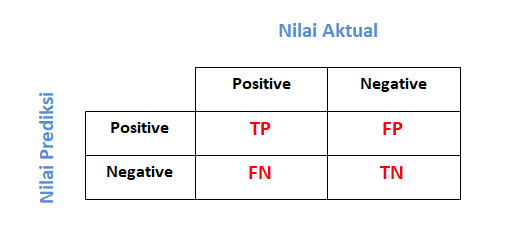

## Decision Tree

In [73]:
df_enc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


In [74]:
#Melakukan extract fitur
X = df_enc[['age','job','education','balance','duration']]
y = df_enc['Class']

X.head(3)

,age,job,education,balance,duration
0,58,4,2,2143,261
1,44,9,1,29,151
2,33,2,1,2,76


Memilih fitur yang digunakan untuk melakukan Decision Tree

In [75]:
#splitting data 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2024)

dilakukan split data training dan testing dengan ukuran testing sebesar 30%

In [76]:
#building model
dtc_model = DecisionTreeClassifier()

In [77]:
#fitting model with data training
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

Membangun model Decision Tree dengan memanggil DecisionTreeClassifier dan melakukan fit data training kepada model tersebut

In [78]:
print('train set score: ', dtc_model.score(X_train, y_train))
print('test set score : ', dtc_model.score(X_test, y_test))

train set score:  1.0
test set score :  0.8423031554113831


Didapatkan hasil train score data adalah 1 dan test score nya adalah 0,84. Score di atas menunjukkan angka yang cukup baik, namun tampaknya telah terjadi overfitting data setelah dibandingkan antara kedua score tersebut

In [79]:
y_pred_train = dtc_model.predict(X_train)
y_pred_dt =  dtc_model.predict(X_test)

print('train set \n\n', classification_report(y_train, y_pred_train))
print('test set \n\n', classification_report(y_test, y_pred_dt))

train set 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27965
           1       1.00      1.00      1.00      3682

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647

test set 

               precision    recall  f1-score   support

           0       0.91      0.91      0.91     11957
           1       0.34      0.35      0.35      1607

    accuracy                           0.84     13564
   macro avg       0.63      0.63      0.63     13564
weighted avg       0.84      0.84      0.84     13564



Code di atas digunakan untuk melihat classification report dari model yang telah dibangun

In [80]:
# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred_dt))


Confusion Matrix of model :
 [[10860  1097]
 [ 1042   565]]


Dapat dilihat dari confusion matrix bisa diketahui bahwa model dapat memprediksi benar 10.831 data yang benar labelnya, dan 574 data yang salah labelnya. serta data yang benar namun dianggap salah berjumlah 1033 dan data yang salah namun dianggap benar berjumlah 1126 data

## Random Forest

In [81]:
#Melakukan extract fitur
X = df_enc[['age','job','education','balance','duration']]
y = df_enc['Class']

In [82]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

dilakukan splitting data sebanyak 30% data dijadikan data testing

In [83]:
X_train.head()

,age,job,education,balance,duration
25053,38,4,2,193,191
15274,34,1,1,39,138
11721,35,3,0,1465,40
43113,32,9,1,324,432
9796,39,10,0,7372,76


menampilkan 5 data teratas feature training atau X_train

In [84]:
#building model
rfc_model = RandomForestClassifier(n_estimators=100)

#fitting model
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

Code di atas berguna untuk membangun model dengan memanggil RandomForestClassifier dengan n_estimators atau  jumlah pohon keputusan yang akan dibangun dalam model. Pohon keputusan ini dibangun secara acak dengan memilih sampel acak dari dataset dan fitur acak untuk setiap pohon yang dibangun. 

In [85]:
print('train set score: ', rfc_model.score(X_train, y_train))
print('test set score : ', rfc_model.score(X_test, y_test))

train set score:  0.9999684014282555
test set score :  0.8863167207313477


Dapat dilihat hasil scoring antara data training dan data testing di atas sedikit overfitting karena salah satu skor mendapatkan nilai akurasi score 1.0

In [86]:
#predict data
y_pred_rfc =  rfc_model.predict(X_test)

print('test set \n\n', classification_report(y_test, y_pred_rfc))

# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred_rfc))

test set 

               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11957
           1       0.54      0.25      0.35      1607

    accuracy                           0.89     13564
   macro avg       0.72      0.61      0.64     13564
weighted avg       0.86      0.89      0.87     13564


Confusion Matrix of model :
 [[11614   343]
 [ 1199   408]]


Kemudian dilakukan predikasi data dari data X_test, dapat diketahui bahwa akurasi yang didapatkan adalah 0.84 dengan TP 10.831, TN 574, FP 1126, dan FN 1033

## Naive Bayes

In [87]:
#Melakukan extract fitur
X = df_enc[['age','job','education','balance','duration']]
y = df_enc['Class']

Melakukan ekstrak fitur dengan memilih X untuk menyimpan kolom feature dan y untuk target class

In [88]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

Dilakukan splitting data dengan train_test_split dengan testing data 30% 

In [89]:
#building model
NB_model = GaussianNB()

Membuat model Naive Bayes dengan memanggil fungsi GaussianNB()

In [90]:
#fitting model
NB_model.fit(X_train, y_train)

GaussianNB()

Dilakukan fitting model data dengan parameter data training

In [91]:
print('train set score: ', NB_model.score(X_train, y_train))
print('test set score : ', NB_model.score(X_test, y_test))

train set score:  0.8812525673839543
test set score :  0.8794603361840165


Melihat akurasi score dari data training dan testing dari model Naive Bayes yang telah dibangun. dapat dilihat akurasi yang dihasilkan cukup baik dan tidak terjadi overfitting

In [92]:
#predict data
y_pred_nb =  NB_model.predict(X_test)

print('test set \n\n', classification_report(y_test, y_pred_nb))

# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred_nb))

test set 

               precision    recall  f1-score   support

           0       0.91      0.96      0.93     11957
           1       0.48      0.28      0.35      1607

    accuracy                           0.88     13564
   macro avg       0.70      0.62      0.64     13564
weighted avg       0.86      0.88      0.86     13564


Confusion Matrix of model :
 [[11480   477]
 [ 1158   449]]


Dapat dilihat akurasi test set adalah 0.88 dengan TP 11480, TN 449, FP 477, dan FN 1158.

.

In [94]:
print('Accuracy Score:\n')
print('Logistic Regression :', accuracy_score(y_test, y_pred_lr))
print('Decision Tree       :', accuracy_score(y_test, y_pred_dt))
print('Random Forest       :', accuracy_score(y_test, y_pred_rfc))
#print('SVM                 :', accuracy_score(y_test, y_pred_sv))
print('Naive Bayes         :', accuracy_score(y_test, y_pred_nb))
print('KNN                 :', accuracy_score(y_test, y_pred_knn))

Accuracy Score:

Logistic Regression : 0.8894131524624005
Decision Tree       : 0.8423031554113831
Random Forest       : 0.8863167207313477
Naive Bayes         : 0.8794603361840165
KNN                 : 0.8740784429371866


SVM                 : 0.8703021370670597

untuk nilai svm terjadi error dalam penampilannya, maka dilihat dari accuracy score yang telah dibuat di atas

### Kesimpulan
Dari akurasi skor di atas dapat diambil kesimpulan bahwa model-model yang telah dibuat di atas menghasilkan akurasi yang cukup baik. Namun, di antara ke 6 model tersebut, Logistic Regression memiliki akurasi yang lebih baik.

Hal ini juga dipengaruhi confusion matrix yang dimiliki oleh Logistic Regression yang cukup baik. Selain itu, algoritma ini lebih cepat dibandingkan SVM model